<h1><center>Financial Modelling Final Assignment</center></h1>

<h1><center>Bloomberg Data</center></h1>

### Downloading Data from Bloomberg

Steps to download required data from Bloomberg:

1. **Log in to Bloomberg Terminal**:
    - Opened the Bloomberg Terminal and logged in using my credentials.

2. **Navigate to the Data Download Section**:
    - In the Bloomberg Terminal, navigated to the data download section. This is under the "Export" or "Download" menu.

3. **Select the Data Type and Parameters**:
    - Choose the type of financial data I need (in this case, the securities of choice).
    - Set the parameters such as date range, frequency (daily, monthly), and specific financial instruments.

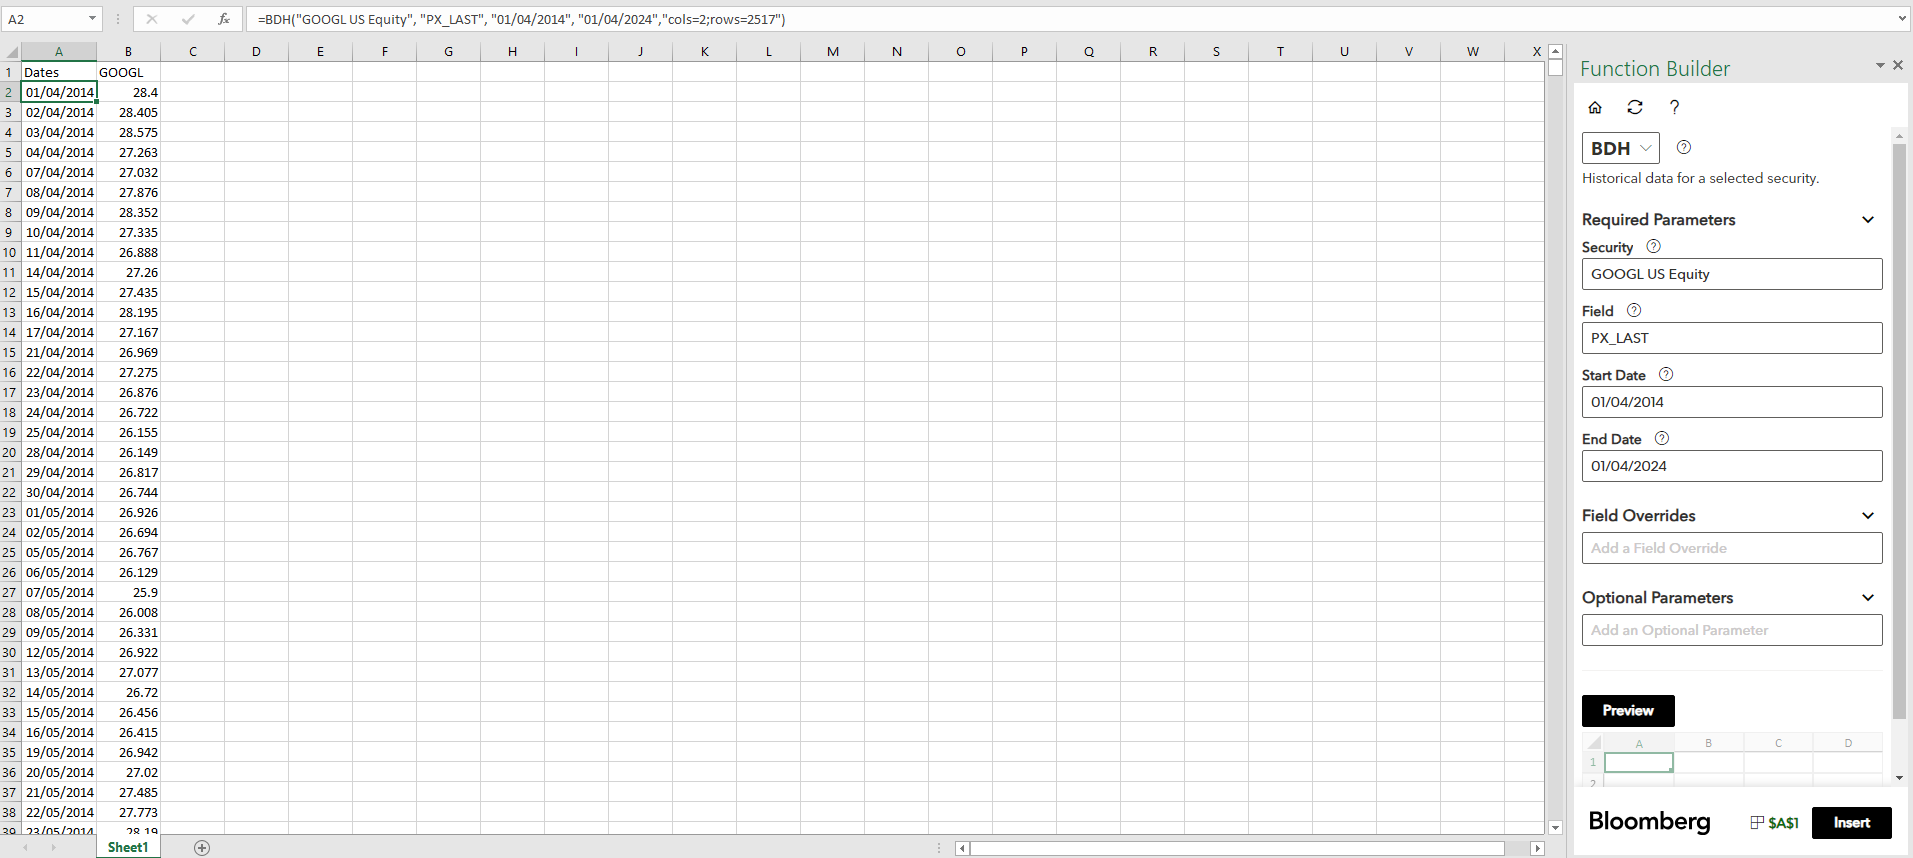

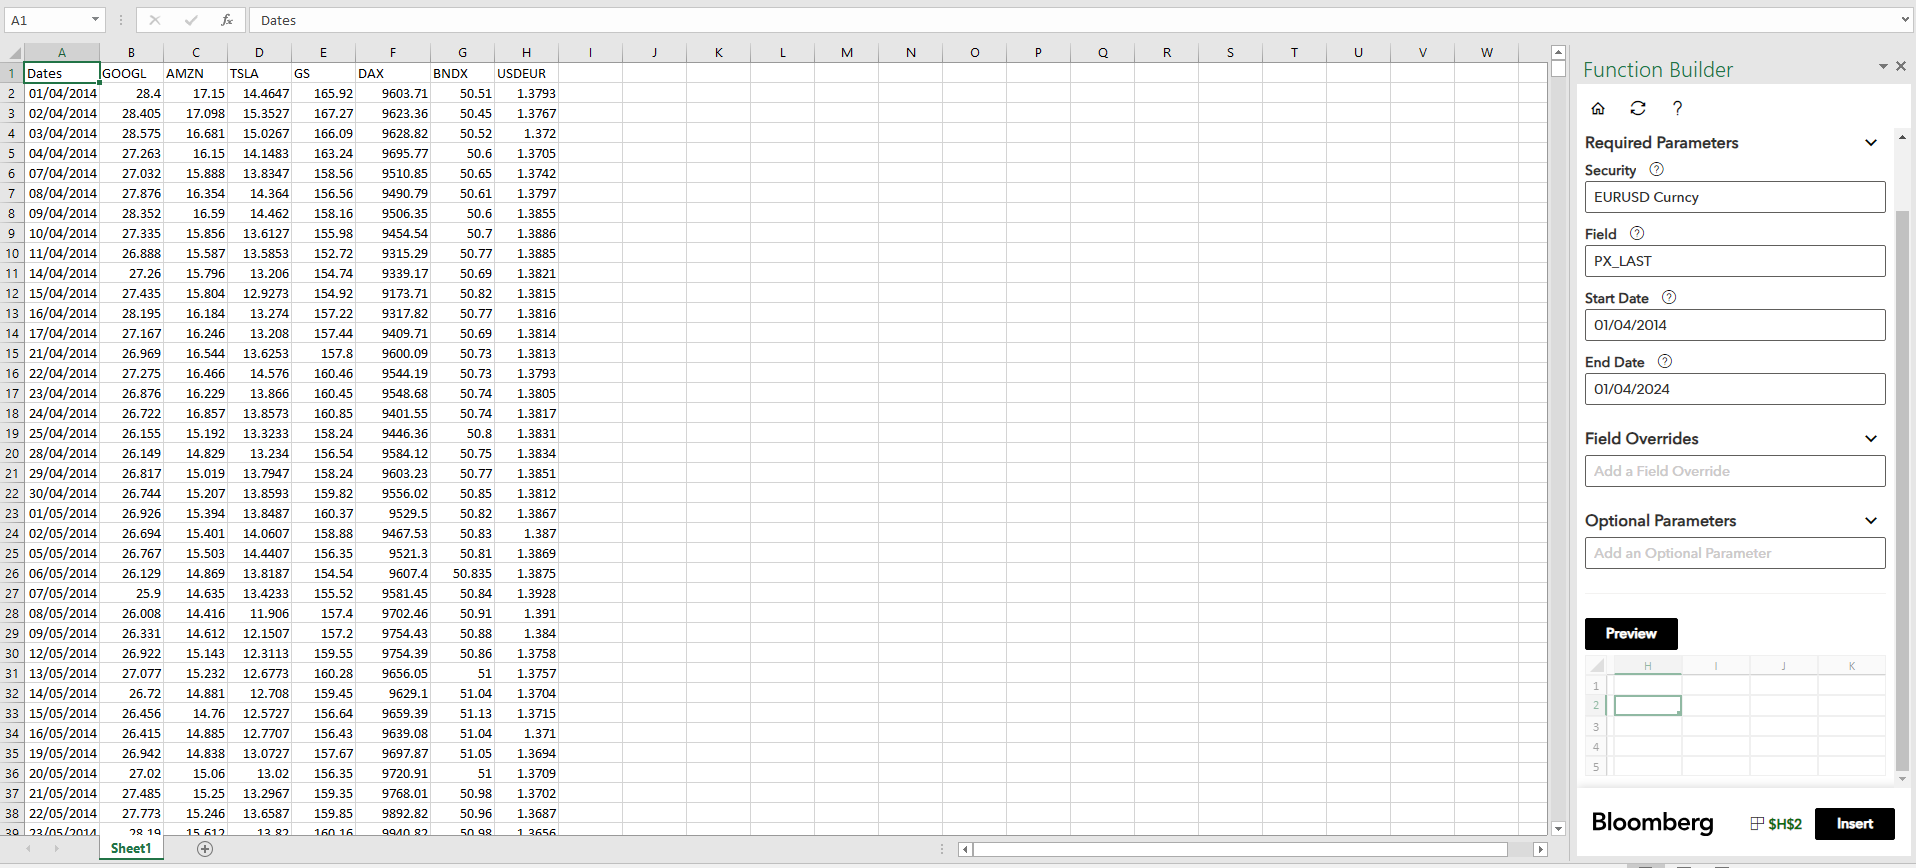

4. **Download the Data**:
    - Click on the download button to export the data to a CSV file.

5. **Save the Data**:
    - Save the downloaded CSV file.


<h1><center>Data Importation </center></h1>

In [1]:
# Importing relevant libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import matplotlib as mpl  # For additional plotting capabilities
import math  # For mathematical functions
%matplotlib inline
import warnings  # To manage warnings
import statsmodels.api as sm  # For statistical modeling
import scipy.stats as scs  # For statistical functions
import scipy.optimize as sco  # For optimization routines
import scipy.interpolate as sci  # For interpolation
from scipy import stats  # For statistical functions
from arch import arch_model  # For GARCH modeling

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## Importing Data
The data is read into the notebook using the pandas library:

In [2]:
# Import the data into the notebook
data = pd.read_csv("blmbrgdata.csv", index_col=0, parse_dates=True)

# Create a new column that holds the values for DAX in USD
data['DAX US'] = data['DAX'] * data['USDEUR']

# Drop the original DAX column and the USDEUR column
data = data.drop('DAX', axis=1)
data = data.drop('USDEUR', axis=1)

# List of securities
securities = ["GOOGL", "AMZN", "TSLA", "GS", "BNDX", "DAX US", "Savings"]
securities_1 = ["GOOGL", "AMZN", "TSLA", "GS", "BNDX", "DAX US"]

## Resampling Data
Resampling data from daily to monthly frequency is essential for long-term investment strategies and portfolio management. The command `data.resample(rule="BM").last()` aggregates daily data into monthly data by taking the last business day's value of each month.

### Benefits of Resampling to Monthly Data

- Monthly data smooths out short-term volatility, revealing long-term trends crucial for decision-making.
- Monthly data reduces computational complexity, making analysis more manageable.
- Aligns dataset frequency with commonly used financial metrics and benchmarks.

Resampling to monthly data provides a clear, long-term view of the dataset from April 2014 to March 2024, essential for assessing trends and making informed investment decisions.

In [3]:
# Resample the data from daily to monthly frequency by taking the last value of each month
resampled_data = data.resample(rule="BM").last()['2014-04':'2024-03']

In [4]:
# Calculate the log returns of the resampled data
datarets = np.log(resampled_data / resampled_data.shift(1))
datarets = datarets.iloc[1:]

<h1><center>Data Interpretation</center></h1>

### Normality Tests

Testing the normality of asset returns is crucial as many financial models assume that returns follow a normal distribution. This section assesses if selected securities' returns conform to a normal distribution.

### The Different Tests

1. **Skewness Test:**
   - **Purpose:** Measures distribution asymmetry.
   - **Method:** `scs.skew(arr)` for skewness, `scs.skewtest(arr)[1]` for p-value. Significant p-value (< 0.05) indicates asymmetry.

2. **Kurtosis Test:**
   - **Purpose:** Indicates distribution "tailedness."
   - **Method:** `scs.kurtosis(arr)` for kurtosis, `scs.kurtosistest(arr)[1]` for p-value. Significant p-value indicates different kurtosis.

3. **Normality Test:**
   - **Purpose:** Checks if returns follow a normal distribution.
   - **Method:** `scs.normaltest(arr)[1]` for p-value. Significant p-value indicates non-normality.

In [5]:
# Define a function to perform normality tests on an array of returns
def normality_tests(arr):
    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    
# Perform normality tests for each security in the list
for srs in securities_1:
    print("\nResults for symbol %s" % srs)
    print(32 * "-")
    log_data = np.array(datarets[srs].dropna())
    normality_tests(log_data)


Results for symbol GOOGL
--------------------------------
Skew of data set         -0.153
Skew test p-value          0.476
Kurt of data set          0.339
Kurt test p-value          0.314
Norm test p-value          0.467

Results for symbol AMZN
--------------------------------
Skew of data set         -0.115
Skew test p-value          0.591
Kurt of data set          0.826
Kurt test p-value          0.076
Norm test p-value          0.179

Results for symbol TSLA
--------------------------------
Skew of data set          0.413
Skew test p-value          0.060
Kurt of data set          0.663
Kurt test p-value          0.123
Norm test p-value          0.052

Results for symbol GS
--------------------------------
Skew of data set         -0.142
Skew test p-value          0.506
Kurt of data set          0.434
Kurt test p-value          0.239
Norm test p-value          0.401

Results for symbol BNDX
--------------------------------
Skew of data set         -0.502
Skew test p-value          

## Covariance Matrix

Calculating the covariance matrix of log returns is fundamental in portfolio analysis. It shows how different assets' returns move relative to each other. Using `datarets.cov()`, we compute this matrix, where each element represents the covariance between two assets' returns.

#### Formula
The Covariance Matrix is defined as:

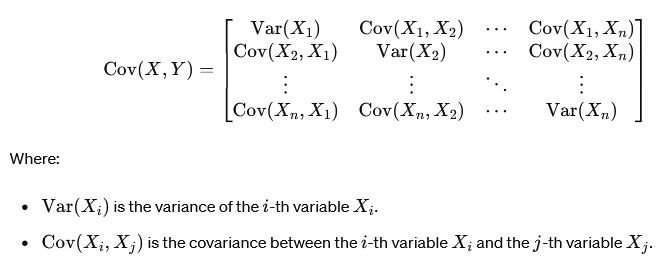

Figure 1

### Components of the Covariance Matrix Formula
1. **Variance (Var(Xi​)):** The variance measures the dispersion of returns for a single asset around its mean return. High variance indicates higher volatility and risk for the asset. Understanding the variance helps in assessing the stability and predictability of an asset's returns.

2. **Covariance (Cov(Xi​,Xj​)):** The covariance measures how two assets move in relation to each other. Positive covariance indicates that the assets move in the same direction, while negative covariance indicates that they move in opposite directions. Covariance is critical for diversification. By combining assets with low or negative covariances, we can reduce the overall risk of the portfolio. Covariance helps identify pairs of assets that provide diversification benefits.

### Importance in Financial Modelling
The covariance matrix is crucial in financial modeling for identifying asset pairs that can provide diversification and reduce portfolio risk. By highlighting assets with low or negative covariances, it helps construct a more stable portfolio by offsetting individual asset risks. This matrix is essential for constructing the efficient frontier and optimizing asset allocation to maximize returns for a given risk level. It is fundamental in applying key financial models such as the Capital Asset Pricing Model (CAPM) and Modern Portfolio Theory (MPT), as both models rely on the covariance matrix to determine expected portfolio returns and minimize unsystematic risk through diversification.

In [6]:
# Calculate the covariance matrix of the log returns
datarets.cov()

,GOOGL,AMZN,TSLA,GS,BNDX,DAX US
GOOGL,0.004524,0.003753,0.004026,0.002517,0.000360,0.002032
AMZN,0.003753,0.007690,0.006314,0.001826,0.000453,0.002311
TSLA,0.004026,0.006314,0.026990,0.003982,0.000406,0.003087
GS,0.002517,0.001826,0.003982,0.006475,0.000193,0.002973
BNDX,0.000360,0.000453,0.000406,0.000193,0.000167,0.000230
DAX US,0.002032,0.002311,0.003087,0.002973,0.000230,0.003199


## Sharpe Ratio

It measures an investment's performance compared to a risk-free asset, adjusted for risk. It is the difference between the investment's returns and the risk-free rate, divided by the standard deviation of the returns.

### Formula
The Sharpe Ratio is defined as:

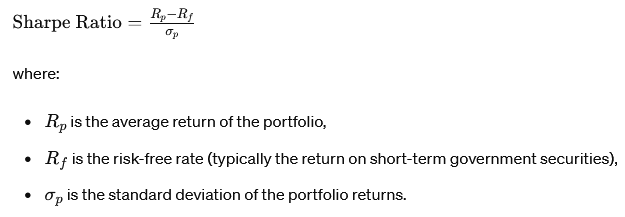

Figure 2

### Components of the Sharpe Ratio Formula

1. **Average Return (R_p):** Expected portfolio return. Higher R_p increases the Sharpe Ratio.

2. **Risk-Free Rate (R_f):** Return on risk-free investments. Higher R_f decreases the Sharpe Ratio.

3. **Standard Deviation (sigma_p):** Portfolio volatility. Lower sigma_p increases the Sharpe Ratio.

### Importance in Financial Modelling

The Sharpe Ratio helps understand an investment's return relative to its risk. A higher Sharpe Ratio indicates better risk-adjusted returns and is used in portfolio management to compare different investments.

## Geometric Brownian Motion (GBM)

The GBM is a mathematical model for simulating future asset price paths, incorporating both deterministic trends and stochastic market movements. It is widely used in financial modeling for option pricing, risk management, and portfolio optimization.

### Formula
The GBM is defined as:

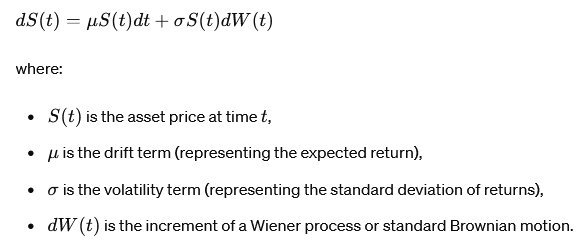

Figure 3

### Components of the GBM Formula

1. **Asset Price (S(t)):** Current price of the asset.
2. **Drift Term (mu):** Expected return; higher mu increases the upward trend.
3. **Volatility Term (sigma):** Measures uncertainty or risk; higher sigma leads to wider fluctuations.
4. **Wiener Process (dW(t)):** Random component introducing stochasticity.

### Importance in Financial Modeling

GBM is crucial for modeling asset prices, incorporating both deterministic and stochastic aspects. It helps understand future price behavior under uncertainty.

**Integration with Portfolio Optimization:**

GBM simulations project future asset prices and returns, critical for estimating risk and return metrics in portfolio optimization.

**Value-at-Risk (VaR):**

GBM estimates Value at Risk (VaR) by simulating potential future asset values and calculating potential losses at a given confidence level.

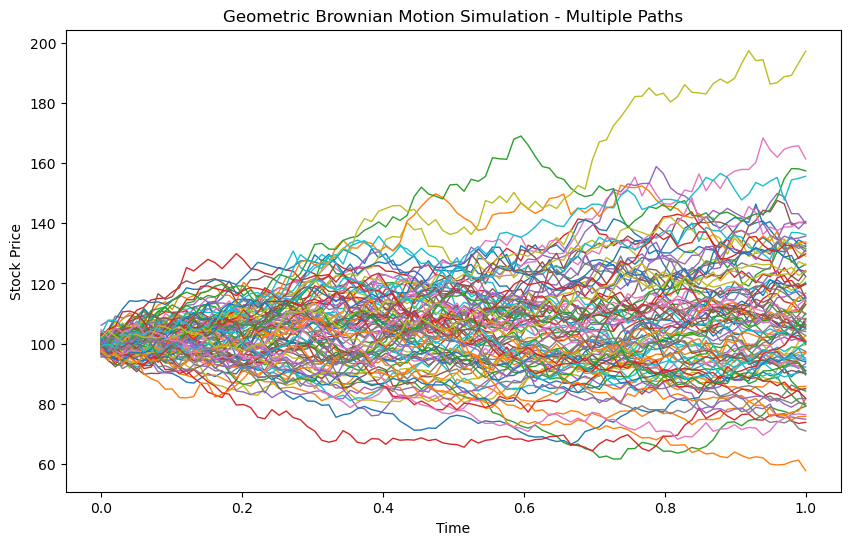

In [8]:
def simulate_gbm_paths(S0, mu, sigma, T, dt, n_paths):
    """
    Simulates multiple paths of a Geometric Brownian Motion.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Drift coefficient
    sigma (float): Volatility coefficient
    T (float): Time horizon
    dt (float): Time step
    n_paths (int): Number of paths to simulate
    
    Returns:
    np.array: Simulated stock prices for multiple paths
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    paths = np.zeros((N, n_paths))
    for i in range(n_paths):
        W = np.random.standard_normal(size=N) 
        W = np.cumsum(W) * np.sqrt(dt)  # cumulative sum to get the Wiener process
        X = (mu - 0.5 * sigma**2) * t + sigma * W
        paths[:, i] = S0 * np.exp(X)
    return t, paths

# Parameters
S0 = 100  # Initial stock price
mu = 0.1  # Drift
sigma = 0.2  # Volatility
T = 1.0  # Time horizon
dt = 0.01  # Time step
n_paths = 100  # Number of paths to simulate

# Simulation
t, stock_paths = simulate_gbm_paths(S0, mu, sigma, T, dt, n_paths)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, stock_paths[:, i], lw=1)
plt.title("Geometric Brownian Motion Simulation - Multiple Paths")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

## Portfolio Optimization and Monte Carlo Simulation

In portfolio optimization, the goal is to allocate investments across various assets to balance return and risk. Monte Carlo simulations create random portfolios and evaluate their performance, modeling the probability of different outcomes influenced by random variables.

### Process

1. Generating Random Weights for each security adding up to one
   -  `weights = np.random.random(nos); weights /= np.sum(weights)`

2. Including Low-Risk Component (savings account)

3. Initializing Lists: `prets` and `pvols` store expected returns and volatilities of simulated portfolios.

4. Simulating 2500 random portfolios with Monte Carlo simulation
   - Expected Returns: Calculated by dotting annual mean log returns (`datarets.mean() * 12`) with weights, excluding the savings account.
   - Expected Volatility: Calculated using the covariance matrix of returns, involving dotting weights with the covariance matrix and taking the square root to account for asset correlations.

In [9]:
# Create random weights for the securities
nos = len(securities)
split = nos * [1. / nos]
weights = np.random.random(nos)
weights /= np.sum(weights)

# Savings account return rate
SR = 0.035

# Initialise lists to store expected portfolio returns and volatilities
prets = []
pvols = []

# Simulate 2500 random portfolios (Monte Carlo Simulation)
for p in range(2500):
    weights = np.random.random(nos)
    weights /= np.sum(weights)
    
    # Calculate the expected portfolio return
    # Multiply the mean returns by weights, annualise by multiplying by 12, and include savings rate
    prets.append(np.sum(datarets.mean() * weights[0:6]) * 12 + weights[6] * SR)
    
    # Calculate the expected portfolio volatility
    # Use the covariance matrix of returns, annualise by multiplying by 12
    pvols.append(np.sqrt(np.dot(weights[0:6].T, np.dot(datarets.cov() * 12, weights[0:6]))))

# Convert lists to numpy arrays
prets = np.array(prets)
pvols = np.array(pvols)

## Visualizing Portfolio Performance

Visualizing the relationship between expected return and volatility is crucial in portfolio optimization. It provides insights into the risk-return trade-off of various portfolio combinations, helping us identify optimal portfolios with the best returns for a given risk level. This section plots expected portfolio returns against their volatilities, incorporating the sharpe ratio for risk-adjusted return evaluation.

### Analysis of the Scatter Plot

- Portfolios with higher Sharpe ratios offer better risk-adjusted returns.
- Shows the trade-off between risk (volatility) and return. Higher expected volatility means higher potential returns but also higher risk.
- The spread of points indicates diversification benefits. A well-diversified portfolio balances risk and return favorably.

The scatter plot represents expected return versus expected volatility for 2500 random portfolios. Portfolios along the upper-left edge are more efficient, offering higher returns for given risk levels.

Text(0.5, 1.0, 'Expected Return and Volatility for Different/Random Portfolio Weights')

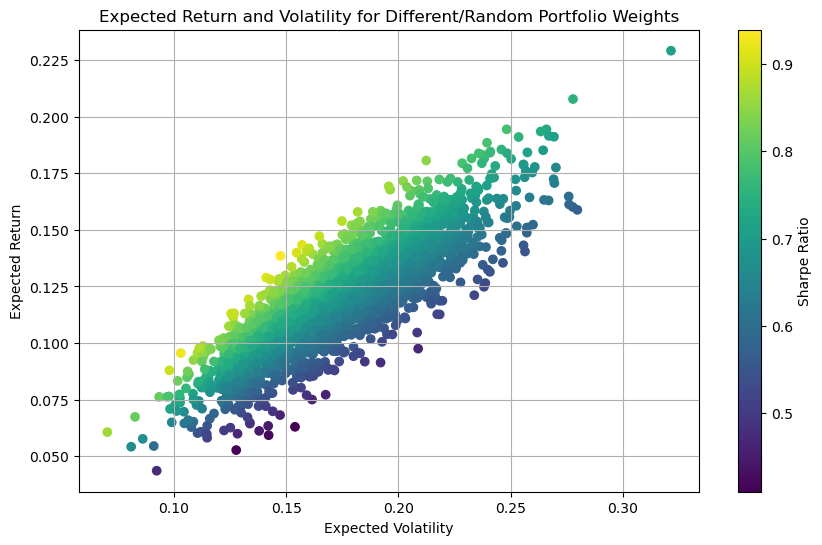

In [10]:
# Plot the graph of expected volatility and expected return for the simulated portfolios
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(pvols, prets, c=prets / pvols, marker='o')  # Create a scatter plot of portfolio volatilities vs. returns
plt.grid(True)  # Add a grid to the plot
plt.xlabel('Expected Volatility')  # Label the x-axis
plt.ylabel('Expected Return')  # Label the y-axis
plt.colorbar(label='Sharpe Ratio')  # Add a colorbar with the label 'Sharpe Ratio'
plt.title("Expected Return and Volatility for Different/Random Portfolio Weights")  # Set the title of the plot

## Defining Functions to Calculate Portfolio Statistics

Calculating key portfolio statistics is essential for evaluating performance and risk characteristics. This section defines functions to compute important metrics: expected portfolio return, volatility, and Sharpe ratio, crucial for portfolio optimization and risk management.

### Key Functions:

1. **Calculating Portfolio Statistics ( `statistics(weights)` ):**
   - **Expected Return:** Dot product of annual mean log returns and asset weights, including the savings account's return.
   - **Volatility:** Dot product of weights and covariance matrix of returns, then taking the square root.
   - **Sharpe Ratio:** Portfolio's excess return over the risk-free rate divided by its volatility.
   - **Output:** Array containing the portfolio's return, volatility, and Sharpe ratio.

2. **Minimizing the Negative Sharpe Ratio ( `min_func_sharpe(weights)` ):**
   - Calculates the negative Sharpe ratio. Minimizing it maximizes the Sharpe ratio, identifying the highest risk-adjusted return portfolio.

3. **Minimizing Portfolio Variance ( `min_func_variance(weights)` ):**
   - Calculates portfolio variance by squaring the portfolio volatility from the `statistics(weights)` function.

4. **Minimize Portfolio Volatility ( `min_func_vol(weights)` ):**
   - Calculates portfolio volatility for given weights and returns the volatility from the `statistics(weights)` function.

In [11]:
# Define a function to calculate portfolio statistics
def statistics(weights):
    weights = np.array(weights)
    # Calculate expected portfolio return
    pret = np.sum(datarets.mean() * weights[0:6]) * 12 + weights[6] * SR
    # Calculate expected portfolio volatility
    pvol = np.sqrt(np.dot(weights[0:6].T, np.dot(datarets.cov() * 12, weights[0:6])))
    # Return portfolio return, volatility, and Sharpe ratio
    return np.array([pret, pvol, (pret - SR) / pvol])

# Define a function to calculate the negative Sharpe ratio (for minimization)
def min_func_sharpe(weights):
    return -statistics(weights)[2]

# Define a function to calculate portfolio variance
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

# Define a function to calculate portfolio volatility
def min_func_vol(weights):
    return statistics(weights)[1]

<h1><center>Portfolio Optimization</center></h1>

### Comprehensive Analysis of Portfolio Optimization Process

In portfolio optimization, defining constraints, maximizing the Sharpe ratio, and minimizing portfolio variance are essential to ensure the portfolio meets specific criteria and realistic investment conditions. This analysis consolidates these processes, emphasizing their significance and practical application.

### Defining Constraints and Bounds

Defining constraints and bounds is crucial for generating feasible portfolios. Constraints ensure the sum of the portfolio weights equals one, allocating all available capital across different assets. Bounds on weights (0 to 1) prevent short selling and over-concentration in any single asset, ensuring the portfolio is practical and aligned with our requirements.

In [12]:
# Defining the constraints for the optimization: the sum of weights must be equal to 1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Defining the bounds for the weights: each weight must be between 0 and 1
bnds = tuple((0, 1) for x in range(nos))

### Maximizing Sharpe Ratio

Maximizing the Sharpe ratio measures an investment's performance relative to a risk-free asset, adjusted for risk. Using the Sequential Least Squares Programming (SLSQP) method, the optimization adjusts asset weights within defined constraints and bounds to identify the optimal portfolio allocation that enhances risk-adjusted returns. Optimal weights achieve a balanced trade-off between return and risk, indicating efficient diversification.

In [13]:
# Perform the optimization to maximize the Sharpe ratio
opts = sco.minimize(min_func_sharpe, split, method='SLSQP', bounds=bnds, constraints=cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7348330034444941
       x: [ 3.551e-01  5.876e-01  4.352e-02  2.602e-18  0.000e+00
            0.000e+00  1.375e-02]
     nit: 5
     jac: [-1.388e-01 -1.389e-01 -1.396e-01 -8.725e-02  7.041e-02
            1.457e-01 -1.389e-01]
    nfev: 41
    njev: 5

### Minimizing Portfolio Variance

Minimizing portfolio variance focuses on reducing risk to the lowest possible level, resulting in a conservative investment strategy, suitable for extremely risk-averse investors. The optimization minimizes portfolio variance within the same constraints and bounds, often allocating to the risk-free asset (savings account). This ensures low volatility and stable returns despite the low absolute return, highlighting the efficiency of a risk-free strategy.

In [14]:
# Perform the optimization to minimize the portfolio variance
optv = sco.minimize(min_func_variance, split, method='SLSQP', bounds=bnds, constraints=cons)
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 8.911947509942367e-35
       x: [ 2.672e-17  0.000e+00  0.000e+00  0.000e+00  1.110e-16
            0.000e+00  1.000e+00]
     nit: 14
     jac: [ 8.089e-10  1.375e-09  4.826e-09  1.158e-09  2.994e-11
            5.720e-10 -0.000e+00]
    nfev: 112
    njev: 14

### Interpreting the Optimal Weights

Interpreting the optimal weights reveals the investment strategy implied by the optimization. In Sharpe ratio maximization, weights balance high-return assets and those providing diversification benefits. In variance minimization, weights indicate a preference for risk-free or low-volatility assets, prioritizing capital preservation. This analysis demonstrates practical applications of maximizing the Sharpe ratio and minimizing portfolio variance, providing valuable insights for constructing portfolios that align with different investment objectives, balancing risk and return for optimal performance.

In [15]:
# Display the optimal weights that maximize the Sharpe ratio, rounded to 3 decimal places
print(opts['x'].round(3))

# Display the portfolio statistics (return, volatility, Sharpe ratio) for the optimal weights
print(statistics(opts['x']).round(3))

# Display the optimal weights that minimize the portfolio variance, rounded to 3 decimal places
print(optv['x'].round(3))

# Display the portfolio statistics (return, volatility, Sharpe ratio) for the optimal weights
print(statistics(optv['x']).round(3))

[0.355 0.588 0.044 0.    0.    0.    0.014]
[0.22  0.252 0.735]
[0. 0. 0. 0. 0. 0. 1.]
[0.035 0.    0.735]


# Efficient Frontier

### Constructing and Visualizing the Efficient Frontier

Constructing the efficient frontier is a fundamental concept in portfolio optimization. It represents the set of optimal portfolios that offer the highest expected return for a given level of risk. This section explains the steps to generate and visualize the efficient frontier using portfolio optimization techniques.

### Re-defining Constraints for Target Return Optimization

The process begins by redefining the constraints to ensure that the portfolio achieves a specific target return while the sum of the weights equals one. 

In [16]:
# Re-define the constraints for the optimization to achieve target returns and ensure the sum of weights equals 1
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},  # Constraint to match the target return
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Constraint to ensure the sum of weights is 1

# Re-define the bounds for the weights: each weight must be between 0 and 1
bnds = tuple((0, 1) for x in weights)

### Generating Target Returns and Minimizing Volatility

An array of target returns is generated, ranging from 0 to 0.25 with 50 evenly spaced points. For each target return, the optimization process minimizes the portfolio's volatility. This involves updating the constraints to match the current target return and performing the optimization using the SLSQP method.

In [17]:
# Generate an array of target returns from 0 to 0.25 with 50 points
trets = np.linspace(0.0, 0.25, 50)
tvols = []

# Loop over each target return to find the corresponding portfolio volatility
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},  # Update constraint for target return
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Ensure sum of weights is 1
    
    # Perform the optimization to minimize portfolio volatility
    res = sco.minimize(min_func_vol, split, method='SLSQP', bounds=bnds, constraints=cons)
    
    # Append the minimized volatility to the list
    tvols.append(res['fun'])

# Convert the list of volatilities to a numpy array
tvols = np.array(tvols)

### Plotting the Efficient Frontier

A function is defined to plot the portfolio results, including the random portfolio compositions, the efficient frontier, and specific points of interest such as the portfolio with the highest Sharpe ratio and the minimum variance portfolio. The plot provides a visual representation of the risk-return trade-off, highlighting the efficient frontier where portfolios offer the best possible returns for a given level of risk.

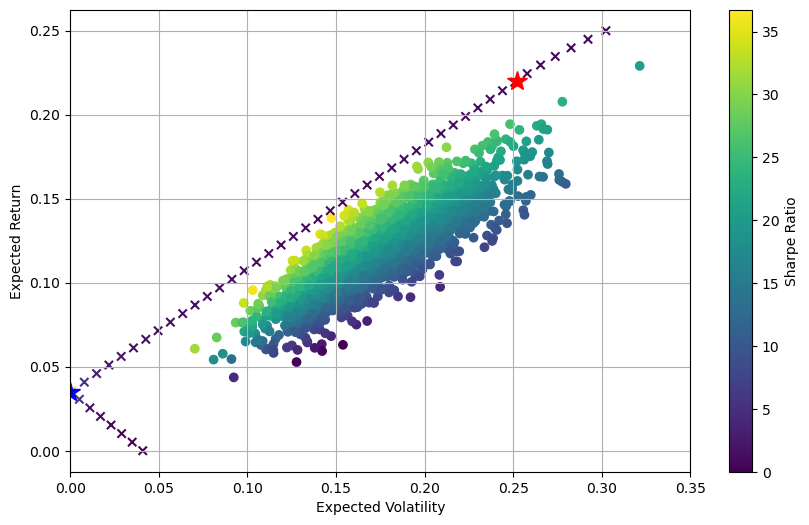

In [18]:
# Define a function to plot portfolio results
def plot_portfolio():
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot random portfolio compositions
    plt.scatter(pvols, prets, c=prets / pvols, marker='o')
    
    # Plot the efficient frontier
    plt.scatter(tvols, trets, c=trets / tvols, marker='x')

    # Highlight the portfolio with the highest Sharpe ratio
    plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)

    # Highlight the minimum variance portfolio
    plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'b*', markersize=15.0)

    plt.grid(True)  # Add grid lines to the plot
    plt.xlabel('Expected Volatility')  # Label the x-axis
    plt.ylabel('Expected Return')  # Label the y-axis
    plt.colorbar(label='Sharpe Ratio')  # Add a colorbar with the label 'Sharpe Ratio'
    plt.xlim(0, 0.35)  # Set the limit for the x-axis

# Call the function to plot the portfolio
plot_portfolio()

### Interpretation of Results

The efficient frontier plot reveals several insights into portfolio performance:

- **Risk-Return Trade-Off:** The plot clearly shows how expected returns increase with higher volatility, illustrating the fundamental trade-off in investment strategies.
- **Efficient Portfolios:** Portfolios along the efficient frontier provide the best risk-adjusted returns, serving as benchmarks for optimal investment strategies.
- **Diversification Benefits:** The spread of points indicates the benefits of diversification, with well-diversified portfolios achieving favorable balances between risk and return.

# Capital Market Line

### Constructing and Visualizing the Efficient Frontier and Capital Market Line

Constructing the efficient frontier and capital market line (CML) are key concepts in portfolio optimization. These concepts represent optimal portfolios and their risk-return trade-offs. This section explains the steps to generate and visualize these important financial metrics.

#### Formula
The formula for the CML is:

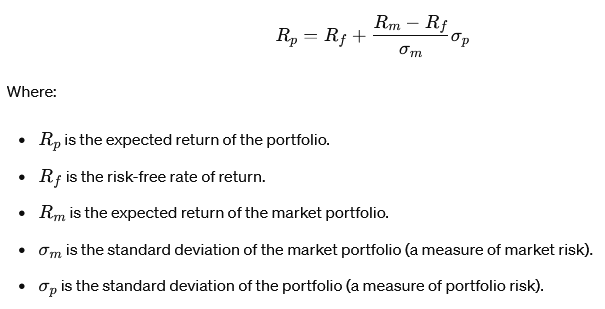

Figure 4

This formula illustrates how the expected return of a portfolio is influenced by its risk, the risk-free rate, and the risk-return profile of the market portfolio.

### Importance in Financial Modelling
The CML helps us make informed decisions about our portfolios by:
- By plotting the CML, we can identify the point where they achieve the highest expected return for a given level of risk.
- The CML provides a visual representation of the trade-off between risk and return, helping us balance these factors according to our risk tolerance.
- Understanding where a portfolio lies on the CML can help us adjust their asset allocation to either take on more risk for higher returns or reduce risk to preserve capital.

#### Calculating Portfolio Returns and Volatility

To assess the performance of different portfolio configurations, two functions are defined:

- **Portfolio Returns:** This function calculates the expected return of a portfolio by considering the weighted sum of the mean log returns of the assets and the return from a savings account.
- **Portfolio Volatility:** This function computes the portfolio's volatility by taking into account the covariance of asset returns, which helps in understanding the risk associated with the portfolio.

In [19]:
# Function to calculate portfolio returns
def port_ret(weights):
    return np.sum(datarets.mean() * weights[0:6]) * 12 + weights[6] * SR

# Function to calculate portfolio volatility
def port_vol(weights):
    return np.sqrt(np.dot(weights[0:6].T, np.dot(datarets.cov() * 12, weights[0:6])))

In [20]:
# Re-define the constraints: sum of weights must be equal to 1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Re-define the bounds for the weights: each weight must be between 0 and 1
bnds = tuple((0, 1) for x in range(nos))

# Set the initial guess for the weights: equal weighting
eweights = np.array(nos * [1. / nos])

In [21]:
# Generate an array of target returns from 0 to 0.25 with 50 points
trets = np.linspace(0.02, 0.25, 50)

# Initialize an empty list to store the total volatility for each target return
tvols = []

# Loop over each target return to find the corresponding portfolio volatility
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},  # Update constraint for target return
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Ensure sum of weights is 1
    
    # Perform the optimization to minimize portfolio volatility
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    
    # Append the minimized volatility to the list
    tvols.append(res['fun'])

# Convert the list of volatilities to a numpy array
tvols = np.array(tvols)

### Fitting the Spline and Defining the Efficient Frontier

After obtaining the minimized volatilities, a spline is fitted to the sorted data of volatilities and returns. This spline represents the efficient frontier, which is the set of optimal portfolios offering the highest expected return for a given level of risk. The efficient frontier function and its first derivative are defined to facilitate the calculation of optimal portfolio weights.

In [22]:
# Find the index of the minimum volatility
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

# Fit the spline to the sorted data
tck = sci.splrep(evols, erets)

# Define the efficient frontier function using spline approximation
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)

# Define the first derivative of the efficient frontier function
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

### Solving for Optimal Portfolio Weights

To find the weights of the optimal portfolio that lies on the efficient frontier, we solve a set of equations that ensure the portfolio return matches the efficient frontier return, and the weights sum to one. This involves minimizing the portfolio's volatility subject to these constraints.

In [23]:
# Define the equations to solve for optimal portfolio weights
def equations(p, SR):
    eq1 = SR - p[0]
    eq2 = SR + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

# Initial guess for the solver
initial_guess = [0.02, 0.5, 0.15]
opt = sco.fsolve(equations, initial_guess, args=(0.035,))
a, b, x = opt

# Define the constraints to ensure no leverage and weights sum to 1
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Perform the optimization to minimize portfolio volatility
res = sco.minimize(min_func_vol, nos * [1. / nos], method='SLSQP', bounds=bnds, constraints=cons)

# Print the optimal weights rounded to 3 decimal places
res['x'].round(3)

array([0.207, 0.343, 0.026, 0.   , 0.   , 0.   , 0.425])

### Plotting the Capital Market Line (CML)

The CML is plotted by first generating a scatter plot of random portfolios with colors representing the Sharpe ratio. The efficient frontier is then plotted, followed by the CML, which has the risk-free rate as its y-intercept and the market portfolio slope. Specific points, such as the tangent portfolio, are highlighted on the plot.

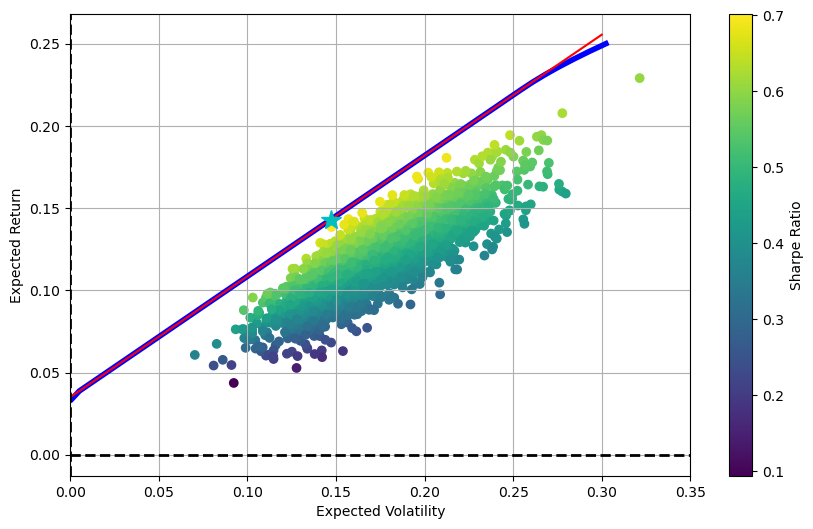

In [24]:
# Plotting the Capital Market Line (CML)

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot of portfolios with colors representing the Sharpe ratio
plt.scatter(pvols, prets, c=(prets - 0.035) / pvols, marker='o')

# Plot the efficient frontier (the line of portfolios with the highest return for a given risk)
plt.plot(evols, erets, 'b-', lw=4.0)

# Generate a range of x values for plotting the CML
cx = np.linspace(0.0, 0.3)

# Plot the CML (Capital Market Line) with risk-free rate as y-intercept and market portfolio slope
plt.plot(cx, a + b * cx, 'r', lw=1.5)

# Plot a single point on the graph, representing the tangent portfolio
plt.plot(x, f(x), 'c*', markersize=15.0)

plt.grid(True)  # Add grid lines to the plot

plt.axhline(0, color='k', ls='--', lw=2.0)  # Add a horizontal line at y=0 (zero return level)
plt.axvline(0, color='k', ls='--', lw=2.0)  # Add a vertical line at x=0 (zero volatility level)

plt.xlabel('Expected Volatility')  # Set the x-axis label
plt.ylabel('Expected Return')  # Set the y-axis label

plt.colorbar(label='Sharpe Ratio')  # Add a color bar to represent the Sharpe ratio

plt.xlim(0, 0.35)  # Set the limit for the x-axis

plt.show()  # Display the plot

### Interpretation of Results
The efficient frontier and CML plots provide several insights into portfolio performance:
- The efficient frontier shows how expected returns increase with higher volatility, illustrating the fundamental trade-off in investment strategies.
- Portfolios along the efficient frontier provide the best risk-adjusted returns, serving as benchmarks for optimal investment strategies.
- The spread of points indicates the benefits of diversification, with well-diversified portfolios achieving favorable balances between risk and return.
- The CML highlights the additional return achievable by leveraging the risk-free asset and the market portfolio, guiding us towards the best possible risk-return combinations.

<h1><center>Value-at-Risk</center></h1>

In [25]:
# Adding the monthly returns of the savings account to the resampled data
resampled_data["Savings"] = (1.035 ** (1/12)) - 1

# Getting the log returns of this new table
datarets_1 = np.log(resampled_data/resampled_data.shift(1))
datarets_1 = datarets_1.iloc[1:]

### Log Return Importance in VaR Analysis
Calculating log returns is essential in Value at Risk (VaR) analysis due to several key advantages:

- Log returns are additive over time periods. This property simplifies the aggregation of returns, making it easier to assess cumulative risk and return for various investment periods.

- Log returns often exhibit a more normal distribution compared to simple returns. This characteristic is advantageous for applying statistical models and risk measures that assume normality, enhancing the reliability of VaR estimates.

- Using log returns ensures consistency in the analysis. This consistency is crucial for maintaining the integrity of financial models and accurately reflecting the compounding nature of returns.

When incorporating the log returns of all assets, including the savings account, the VaR analysis provides a comprehensive assessment of the portfolio's risk. This approach allows for a more accurate understanding of potential maximum loss over a specified period, considering the contributions of all portfolio components. The inclusion of log returns ensures that the analysis captures the true risk dynamics of the portfolio, aiding in effective risk management and decision-making.

### Calculating Value at Risk (VaR)

Value at Risk (VaR) estimates potential portfolio loss over a specified period at a given confidence level. This section explains how to calculate VaR using historical simulation based on log returns.

#### Formula
VaR is defined as:

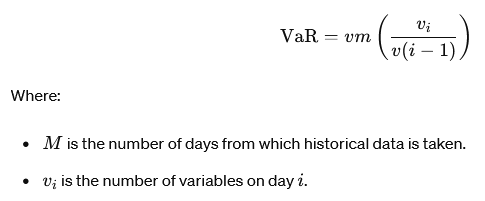

Figure 5

### Components of the VaR Formula
- Number of Days (M):
    - Represents the historical time period for analyzing returns.
    - Longer periods provide more data for a stable risk assessment.

- Number of Variables (vi):
    - The number of variables (e.g., asset returns) on day "i".
    - Ensures all relevant variables are included for accurate risk calculation.

- Ratio of Variables (vi/v(i−1)):
    - Compares the number of variables on day "i" with the previous day.
    - Adjusts VaR calculation for changes in portfolio composition or market conditions.

#### Steps to Calculate VaR

1. Compute portfolio returns by taking the dot product of log returns (`datarets_1`) and optimal weights (`res['x']`).
2. Use percentiles (e.g., 5.0) to specify VaR at the 95% confidence level.
3. Use `np.percentile` to find the 5th percentile of portfolio returns, representing potential loss at the 95% confidence level

In [26]:
# Calculate the portfolio returns
portfolio_returns = datarets_1.dot(res['x'])

# Define the percentiles for VaR calculation
percs = [5.0]

# Calculate VaR using historical simulation
var = np.percentile(portfolio_returns, percs)

# Print the results
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           95.00            0.055


### Interpretation of VaR Results

A VaR of 0.055 at the 95% confidence level means there is a 5% chance the portfolio could lose more than 5.5% of its value over the specified period. Conversely, there is a 95% confidence it will not lose more than 5.5%.

### Importance in Risk Management

- VaR quantifies potential portfolio loss, aiding in understanding risk exposure. Historical simulation uses historical data for future risk estimation, aligning with log returns for normal distribution and accurate VaR calculation.

- VaR using historical simulation is crucial in risk management, providing a quantifiable risk measure for informed investment decisions. Understanding potential losses at different confidence levels helps manage risk and implement mitigation strategies.

## Value-at-Risk with Garch

### Refining Value-at-Risk (VaR) with GARCH
The Value-at-Risk (VaR) can be refined using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model. The GARCH model effectively models financial time series data exhibiting volatility clustering. This section explains calculating VaR using the GARCH model to estimate portfolio volatility over time.

#### Formula
The GARCH(1,1) model is defined as:

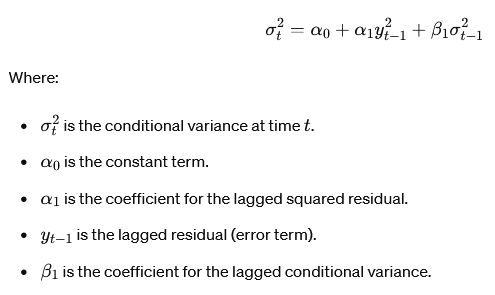

Figure 6

### Components of the GARCH(1,1) Formula

- Conditional Variance (σ^2_t​):
    - Represents the estimated variance of returns at time tt.
    - Important for modeling time-varying volatility in financial returns.

- Constant Term (α0​):
    - A constant component of the variance.
    - Provides the baseline level of volatility in the model.

- Lagged Squared Residual (α1y^2_t-1):
    - The impact of past squared returns on current variance.
    - Captures the "shock" effect of past volatility on current conditions.

- Lagged Residual (y_t−1​):
    - The error term from the previous time period.
    - Reflects the unexpected changes in returns from the past.

- Lagged Conditional Variance (β1σ^2_t-1):
    - The effect of past variance on current variance.
    - Captures the persistence of volatility over time.

#### Steps to Model Volatility with GARCH

- Compute portfolio returns by taking the dot product of log returns (`datarets_1`) and optimal weights (`res['x']`).
- Fit a GARCH(1,1) model to the portfolio returns using the arch_model function, specifying p=1 and q=1. Fit the model without displaying output using `model.fit(disp='off')`.
- Extract conditional volatility from the fitted GARCH model using `garch_fit.conditional_volatility`. This series represents the estimated volatility of the portfolio over time.

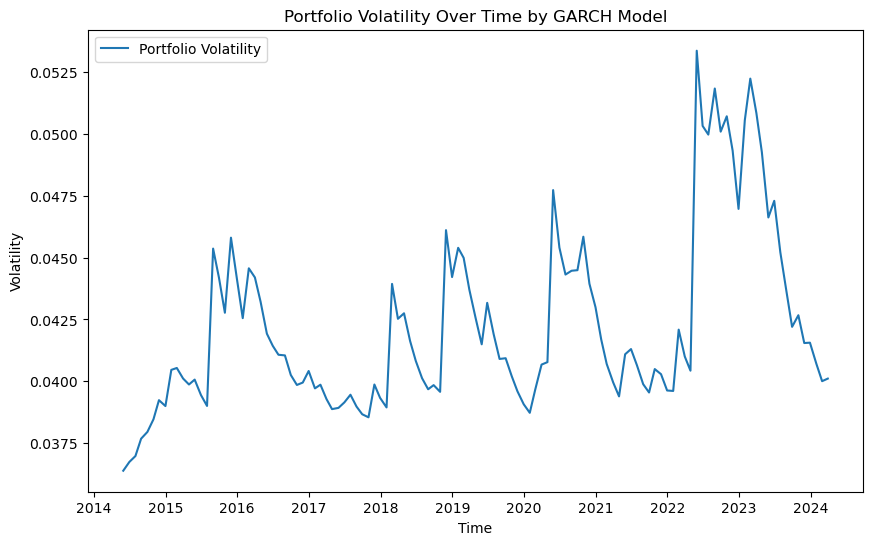

In [27]:
# Displaying the optimal portfolio's volatility over time

plt.figure(figsize=(10, 6))  # Set the figure size

# Calculate portfolio returns by multiplying the returns matrix with the optimal weights vector
port_rets = datarets_1.dot(res['x'])

# Fit a GARCH(1,1) model to the portfolio returns to model the volatility
model = arch_model(port_rets, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Extract the conditional volatility from the fitted GARCH model for plotting
conditional_volatility = garch_fit.conditional_volatility

# Plot the volatility over time
plt.plot(conditional_volatility.index, conditional_volatility, label='Portfolio Volatility')

# Add title and labels to the plot
plt.title('Portfolio Volatility Over Time by GARCH Model')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()  # Display the plot

### Interpretation of GARCH Volatility Plot
The volatility plot provides insights into how the portfolio's risk changes dynamically. Observations may include periods of high and low volatility, reflecting market conditions and economic events. Modeling and visualizing volatility over time is crucial for understanding the portfolio's risk profile and making informed investment decisions.

### Importance in VaR Analysis
Using the GARCH model enhances VaR analysis by providing a more accurate and dynamic measure of risk. Conditional volatility from the GARCH model captures the time-varying nature of market volatility, offering a realistic assessment of potential losses. This approach is particularly useful in volatile markets where traditional static measures may be inadequate.

### Forecasted Value at Risk (VaR) Using GARCH Model

Value at Risk (VaR) measures the potential loss in a portfolio's value over a specified period at a given confidence level. This section outlines forecasting VaR for the portfolio over one month using conditional volatility from the GARCH model.

#### Steps to Calculate Forecasted VaR

1. Use the conditional volatility from the GARCH model to represent the portfolio's time-varying volatility.
2. Specify percentiles for VaR calculation using `percs = [5.0]` to calculate VaR at the 95% confidence level.
3. Use `scoreatpercentile` to determine the 5th percentile of the conditional volatility, representing potential loss at the 95% confidence level.

In [28]:
# Forecasted Value at Risk (VaR) of your portfolio for one month at 95% confidence level

# Calculate the Value at Risk (VaR) at the defined percentiles
var = scs.scoreatpercentile(conditional_volatility, percs)

# Print the header for the output table
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")  # Print a separator line

# Print the confidence level and the corresponding VaR
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           95.00           -0.039


### Interpretation of VaR Results

A VaR of -0.039 at the 95% confidence level means there is a 5% chance the portfolio could lose more than 3.9% of its value over the next month. Conversely, there is a 95% confidence it will not lose more than 3.9%.

### Importance in Risk Management

Forecasting VaR with the GARCH model incorporates time-varying volatility, providing a more accurate risk measure compared to static models. Understanding potential maximum loss helps us make informed decisions to mitigate risks. Using the GARCH model to forecast VaR offers a sophisticated assessment of portfolio risk for dynamic market conditions. This approach aligns with best practices in financial modeling and risk management.

<h1><center>Conclusion</center></h1>

In this financial modelling project, I have explored various key concepts essential for effective portfolio management and risk assessment. Through the integration of Bloomberg data, Python programming, and established financial theories, I have developed a comprehensive approach to optimizing investment portfolios and assessing financial risks.

Portfolio Optimization: Using the Markowitz Efficient Frontier framework, I successfully identified optimal portfolios that balance risk and return. This method highlights the importance of diversification in reducing unsystematic risk and maximizing returns. The theoretical foundation for this approach was greatly informed by the work of Markowitz (1952) and expanded upon by Fabozzi, Gupta, and Markowitz (2007).

Value at Risk (VaR): I implemented the VaR calculation using both historical simulation and the GARCH model to account for time-varying volatility. This dual approach provided a more accurate estimation of potential losses under various market conditions. Understanding and calculating VaR is crucial for effective risk management, as emphasized by Jorion (2006).

GARCH Modelling: The application of the GARCH model enabled me to capture volatility clustering in financial time series data, which is essential for accurate risk forecasting. Engle’s (2001) work on GARCH models provided a solid theoretical basis for this part of my analysis, helping to improve the precision of my risk assessments.

Correlation and Covariance Analysis: By analyzing the correlation matrix, I was able to understand the relationships between different assets and their implications for portfolio diversification. This analysis is critical for constructing a well-diversified portfolio that minimizes risk and enhances returns. The theoretical insights from Bodie, Kane, and Marcus (2014) were invaluable in this regard.

<h1><center>References</center></h1>

### General References
- Bodie, Z., Kane, A., & Marcus, A. J. (2014). Investments. 10th ed. McGraw-Hill Education.
- Elton, E.J., Gruber, M.J., Brown, S.J., and Goetzmann, W.N. (2009) Modern Portfolio Theory and Investment Analysis. 8th edn. Wiley.
- Engle, R.F. (2001) 'GARCH 101: The Use of ARCH/GARCH Models in Applied Econometrics', Journal of Economic Perspectives, 15(4), pp. 157-168.
- Fabozzi, F. J., Gupta, F. and Markowitz, H. M. (2007) The Theory and Practice of Investment Management. 2nd edn. Wiley.
- Hilpisch, Y. (2018). Python for Finance. 2nd ed. O'Reilly Media.
- Jorion, P. (2006) Value at Risk: The New Benchmark for Managing Financial Risk. 3rd edn. McGraw-Hill.
- Markowitz, H. (1952) 'Portfolio Selection', The Journal of Finance, 7(1), pp. 77-91.

### Formula References
- arch/GARCH models: Stat 510 (no date) PennState: Statistics Online Courses. Available at: https://online.stat.psu.edu/stat510/lesson/11/11.1 (Accessed: 23 May 2024). 
- Ganti, A. (2024) Understanding Capital Market Line (CML) and how to Calculate it, Investopedia. Available at: https://www.investopedia.com/terms/c/cml.asp (Accessed: 23 May 2024).
- Harper, D.R. (2023) What is value at risk (VAR) and how to calculate it?, Investopedia. Available at: https://www.investopedia.com/articles/04/092904.asp (Accessed: 23 May 2024).
- Random Vectors and the Variance-Covariance Matrix (no date). Available at: https://www.math.kent.edu/~reichel/courses/monte.carlo/alt4.7d.pdf.
- Sharpe Ratio (no date) Wall Street Prep. Available at: https://www.wallstreetprep.com/knowledge/sharpe-ratio/.
- Sigman, K. (2006) Geometric Brownian Motion. Available at: https://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-GBM.pdf (Accessed: 23 May 2024).
- Zivanovic, F. (2023) Arithmetic vs logarithmic returns - what investors need to know, ExplorePortfolio Blog. Available at: https://blog.exploreportfolio.com/simple-vs-log-returns/ (Accessed: 23 May 2024).